<center><img src="https://github.com/FASSt-simulation/fasst_simulation_tools/raw/main/images/site-logo.png" width=150 height=150 alt="NGEE-Arctic Logo"/></center>

# Tutorial: *Exploring the results from a small ELM ensemble simulation*
This tutorial illustrates how to evaluate the results from a small parameter ensemble perturbation experiment with ELM at one of the four [NGEE-Arctic](https://ngee-arctic.ornl.gov/) study sites.


In [1]:
# Load the required Python libraries

import matplotlib.pyplot as plt
import xarray
from netCDF4 import Dataset 
import os
import cftime
import ipywidgets as widgets
import glob, numpy

In [2]:
# Create ensemble case root run output directories

output_rootdir=os.path.expanduser('~')+'/output/cime_run_dirs/UQ/'
cases=numpy.asarray(glob.glob("%s*20TR*" % output_rootdir))
cases=[x.split('/')[-1] for x in cases]
cases_dropdown = widgets.Dropdown(options=cases,
                                description='Chose Case Name:',
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

In [3]:
# Show a dropdown menu to select specific case output
# Any cases that have been run in our elmoutput directory will be displayed
# Case names will contain the site codes:
# AK-BEO; AK-CLG; AK-K64G AK-TLG

display(cases_dropdown)

Dropdown(description='Chose Case Name:', layout=Layout(width='max-content'), options=('OLMT_ens_AK-K64G_ICB20T…

In [4]:
## show ensemble sub-folders for the root transient case
ensemble_root_dirs=output_rootdir+cases_dropdown.value+"/"
ens_dirs=sorted(numpy.asarray(glob.glob("%s*g*" % ensemble_root_dirs)))
ens_cases=sorted([x.split('/')[-1] for x in ens_dirs])
print(ens_dirs)
print(ens_cases)

['/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00001', '/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00002', '/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00003']
['g00001', 'g00002', 'g00003']


In [5]:
## read in outputs
for x in range(0,len(ens_dirs),1):
  print(ens_dirs[x])
  #globals()[''.join('output_'+x)]=ens_dirs[x]+'/'+%x+'ELM_output.nc'
  #''.join(ens_dirs[x]+'/'+x+'ELM_output.nc')
  temdir=ens_dirs[x]
  #os.path.join(temdir,x)
  print(''.join(["output_",str(x)]))
  #''.join(["output_",str(x)])=ens_dirs[x]+'ELM_output.nc'
  output_file=ens_dirs[x]+'/'+'ELM_output.nc'
  globals()[''.join(["output_",str(x)])]=xarray.open_dataset(output_file).squeeze()
    
  #xarray.open_dataset(output_file).squeeze()
  #output+"_"+x=ens_dirs+x
 # globals()[f"my_variable_{i}"]
  #globals()[''.join('output_'+x)]=ens_dirs+'/'+x+'ELM_output.nc'

    



#[''.join(random.sample(alphabet,random.randint(3,26)))]
#output_file=output_casedir+ens_dropdown.value

/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00001
output_0
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00002
output_1
/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00003
output_2


In [6]:
print(output_0)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 1826, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 1855-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float32

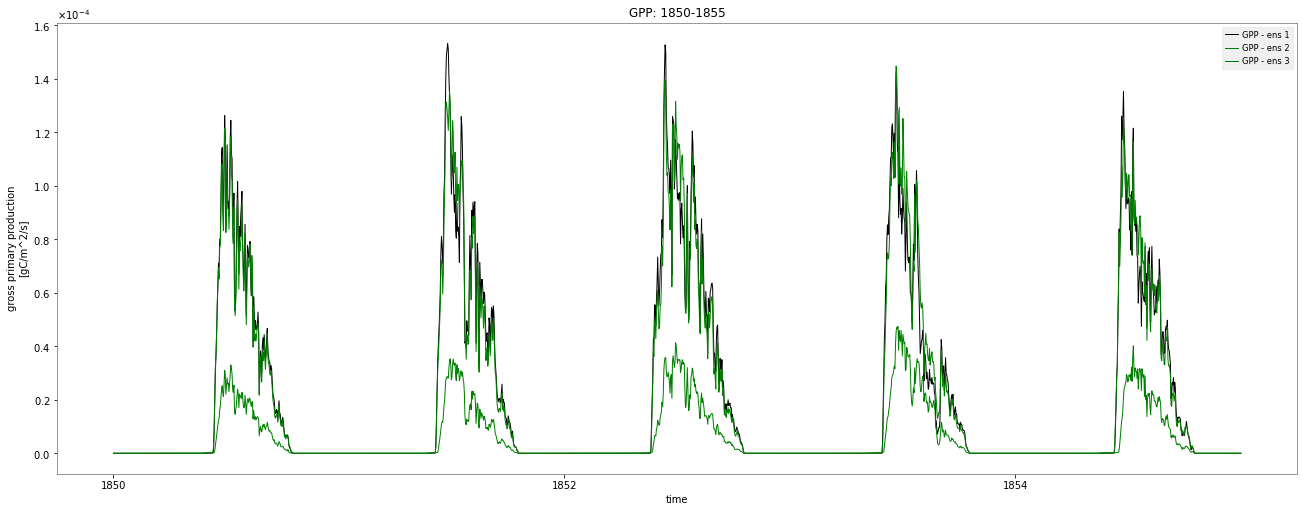

In [7]:
# Subset output to the 1990-2000 period
timerange_1=slice('1850-01-01','1855-01-01')

# Create the figure
fig, ax = plt.subplots(clear=True, figsize=(18,7))
output_0['GPP'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='GPP - ens 1')
ax.legend()
ax.set_title('GPP: 1850-1855')
output_1['GPP'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='green',label='GPP - ens 2')
ax.legend()
ax.set_title('GPP: 1850-1855')
output_2['GPP'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='green',label='GPP - ens 3')
ax.legend()
ax.set_title('GPP: 1850-1855')


plt.show()

In [ ]:
output_file=output_casedir+ncfiles_dropdown.value

In [28]:
#ens_dirs=numpy.asarray(glob.glob("%s*g*" % output_rootdir+cases_dropdown.value))
#ens
ensembles=output_rootdir+cases_dropdown.value+"/"
print(ensembles)
#os.listdir(ensembles)
ens_dirs=glob.glob("%s*g*" % ensembles, recursive = True)
print(ens_dirs)

/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/
['/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00002', '/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00003', '/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00001']


In [41]:
# Get the output nc file options
ensembles=output_rootdir+cases_dropdown.value+"/"
ens_dirs=numpy.asarray(glob.glob("%s*g*" % ensembles+"/"))
print(ens_dirs)
filenames=numpy.asarray(glob.glob("%s*.elm.h?.*.nc" % ens_dirs+"/"))
print(filenames)
filenames=sorted([x.split('/')[-1] for x in filenames])
if(os.path.exists(output_casedir+'ELM_output.nc')): filenames.insert(0,'ELM_output.nc')

ncfiles_dropdown = widgets.Dropdown(options=filenames,
                                description='Choose Output File:', 
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

['/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00002/'
 '/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00003/'
 '/home/jovyan/output/cime_run_dirs/UQ/OLMT_ens_AK-K64G_ICB20TRCNPRDCTCBC/g00001/']
[]


In [42]:
# Display the output nc file options - in most cases you will select ELM_output.nc

display(ncfiles_dropdown)

Dropdown(description='Choose Output File:', layout=Layout(width='max-content'), options=(), style=DescriptionS…